# Math 352 Assignment 2
### Kaetlyn Gibson
### Math 352

## Problem 1
In this problem we will analyze the turnip market in the video game Animal Crossing: New Horizons. 

Every Sunday, Daisy Mae (a pig) comes to your island and sells turnips. The sell price of the turnips fluctuates from week to week, but it generally costs around 100 Bells to buy 10 turnips (turnips are purchased and sold in bundles of 10).

During the following week (Monday through Saturday), the store ”Nook’s Cranny” will purchase turnips from you, if you want.  The price of turnips fluctuates wildly (but not entirely randomly) throughout the week: there’s a different buy price in the morning and in the afternoon (so 12 different prices in all). If the turnips aren’t sold by Saturday PM, they all instantly rot and are worthless.

The file prices.csv contains several years of simulated turnip prices. The records are of the form: (Daisy Mae Price, Mon AM price, Mon PM price,..., Sat AM price, Sat PM price). 

Imagine that you make a large turnip purchase on Sunday, and then you watch the prices for the next couple of days.  If possible, you want to sell the turnips for a huge profit (over 200%).  If this isn’t going to happen, you have to get some friends together to help you sell the turnips on another island - but this takes a lot of time and effort.

The file partial.csv contains 10 partial records: all of the data up until Tuesday. For each:  is there a reasonable possibility that your turnips can be sold on your islands at a good profit?

Hint:  Use the singular value decomposition.

In [1]:
# import statements
import numpy as np
import pandas as pd
from scipy.linalg import diagsvd

I know some stuff about "pandas" from my Biology 399 Comp. Genomics class (not the animal)!

In [2]:
# read file + put in dataframe (also display data in a nice visual way)
x = pd.read_csv('turnips-10years.csv', names=["DMP", "MAP", "MPP", "TuAP", "TuPP", "WAP", "WPP", "ThAP", "ThPP", "FAP", "FPP", "SAP", "SPP"])
x

,DMP,MAP,MPP,TuAP,TuPP,WAP,WPP,ThAP,ThPP,FAP,FPP,SAP,SPP
0,94,83,79,75,72,69,64,60,56,52,48,44,40
1,103,122,95,64,59,114,129,129,108,78,68,62,127
2,102,88,84,79,75,71,67,62,58,53,48,45,42
3,107,93,89,126,170,592,161,110,95,71,71,70,92
4,91,59,55,52,48,44,119,108,146,155,150,68,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100,86,82,77,73,69,65,60,57,53,48,44,40
496,108,130,85,79,150,126,114,104,105,115,66,58,52
497,101,90,86,83,78,110,181,277,156,130,77,54,44
498,96,74,95,108,184,186,166,57,53,50,46,42,38


In [3]:
# present data as an array/matrix
dmp = x["DMP"]
map = x["MAP"]
mpp = x["MPP"]
tuap = x["TuAP"]
tupp = x["TuPP"]
wap = x["WAP"]
wpp = x["WPP"]
thap = x["ThAP"]
thpp = x["ThPP"]
fap = x["FAP"]
fpp = x["FPP"]
sap = x["SAP"]
spp = x["SPP"]

data = np.array([dmp, map, mpp, tuap, tupp, wap, wpp, thap, thpp, fap, fpp, sap, spp])
data = data.T  # transpose so data appears correct 
print(data)


[[ 94  83  79 ...  48  44  40]
 [103 122  95 ...  68  62 127]
 [102  88  84 ...  48  45  42]
 ...
 [101  90  86 ...  77  54  44]
 [ 96  74  95 ...  46  42  38]
 [ 99 122  95 ...  63  56  49]]


In [4]:
# sift through and find good or bad weeks from data
g_dict = {}
b_dict = {}

hit = False
for i in range(500):
    for j in range(13):
        if data[i][j] >= 200:
            hit = True
    if hit == True:
        g_dict[i] = data[i]
    else:
        b_dict[i] = data[i]
    hit = False          
            
print(f"g: {g_dict}")
print(f"b: {b_dict}")

g: {3: array([107,  93,  89, 126, 170, 592, 161, 110,  95,  71,  71,  70,  92],
      dtype=int64), 9: array([ 91,  82,  79,  75, 105, 179, 230, 154, 120,  44,  80,  76,  48],
      dtype=int64), 18: array([101,  87,  83,  80,  75,  71,  67, 134, 154, 470, 198, 117,  52],
      dtype=int64), 20: array([105,  92,  88,  83,  78,  75,  70,  66, 147, 210, 286, 174, 112],
      dtype=int64), 24: array([103,  63,  59,  56, 124, 136, 177, 202, 152,  55,  51,  47,  43],
      dtype=int64), 26: array([107,  93,  89, 111, 198, 609, 202, 134,  51,  61,  57,  49,  52],
      dtype=int64), 36: array([ 99,  89,  86, 108, 162, 302, 145, 104,  41,  63,  59,  70,  61],
      dtype=int64), 44: array([ 92,  81,  77,  72,  69,  65,  87, 144, 326, 160, 101,  70,  74],
      dtype=int64), 52: array([102,  89,  85,  80,  77, 130, 202, 485, 172, 141,  61,  75,  72],
      dtype=int64), 55: array([103,  88, 101, 180, 490, 168, 111,  68,  71,  48,  83,  47,  65],
      dtype=int64), 59: array([ 99,  85,  82, 11

In [5]:
# now remove prices after first 5 coordinates from the data so we only look at 
# Sunday, monday AM, monday PM, tuesday AM, and tuesday PM prices.
A = np.array([dmp, map, mpp, tuap, tupp])
A = A.T
print(A)

[[ 94  83  79  75  72]
 [103 122  95  64  59]
 [102  88  84  79  75]
 ...
 [101  90  86  83  78]
 [ 96  74  95 108 184]
 [ 99 122  95 112 128]]


https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [6]:
# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

print(f"U: \n{U}\n")
print(f"Sigma: \n{S}\n")
print(f"V^T: \n{VT}\n")

U: 
[[-3.63181996e-02 -2.41739777e-02 -1.12812863e-02 ... -4.51893250e-02
  -4.62246664e-02 -3.79409374e-02]
 [-3.93788483e-02 -5.26832911e-02 -1.25877121e-02 ...  1.14661229e-03
   2.85145775e-02 -6.35755081e-02]
 [-3.85464288e-02 -2.73315840e-02 -1.55445204e-02 ... -7.37497226e-03
   4.10297167e-02 -3.14449691e-02]
 ...
 [-3.94658578e-02 -2.60019114e-02 -8.42322929e-03 ...  9.97720456e-01
  -1.13999691e-03 -1.11747289e-03]
 [-5.19948334e-02  5.12792337e-02 -1.23329440e-02 ... -9.54450230e-04
   9.93379940e-01  3.66041982e-04]
 [-5.06427961e-02 -3.81325590e-03  2.07033011e-02 ... -1.45992335e-03
   2.47393298e-04  9.92277705e-01]]

Sigma: 
[4919.77161967 1182.29210907  448.69029952  342.83369001  277.34573235]

V^T: 
[[-0.44040577 -0.4135296  -0.41158565 -0.43259359 -0.52772726]
 [-0.3732367  -0.40491529 -0.24379946  0.02563951  0.79789875]
 [-0.72194633  0.07903767  0.38409265  0.53482995 -0.19742418]
 [ 0.37651754 -0.65553831 -0.11397852  0.60911025 -0.2109447 ]
 [-0.06136094  0.478

In [7]:
# A = USV^T
# AV = US(V^TV)
# AV = US
V = VT.T
AV = np.matmul(A, V)
print(AV)

[[-178.67724782  -28.58070305   -5.06180372    2.47391596   -0.91782811]
 [-193.73494048  -62.28703938   -5.64798433  -25.48500827    0.84391276]
 [-189.63962637  -32.31391612   -6.97467551    3.442079     -1.45908446]
 ...
 [-194.16300727  -30.74185463   -3.77942127    3.3301347    -0.53959178]
 [-255.80270565   60.62703341   -5.53367234    3.77797123   -9.02463323]
 [-249.15099113   -4.50838236    9.28937038  -12.3089708    17.42569773]]


In [8]:
US = U[:, :5] * S
print(US)

[[-178.67724782  -28.58070305   -5.06180372    2.47391596   -0.91782811]
 [-193.73494048  -62.28703938   -5.64798433  -25.48500827    0.84391276]
 [-189.63962637  -32.31391612   -6.97467551    3.442079     -1.45908446]
 ...
 [-194.16300727  -30.74185463   -3.77942127    3.3301347    -0.53959178]
 [-255.80270565   60.62703341   -5.53367234    3.77797123   -9.02463323]
 [-249.15099113   -4.50838236    9.28937038  -12.3089708    17.42569773]]


In [9]:
# check to make sure AV = US
np.allclose(AV, US) 

True

In [10]:
# project data
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)
print(PUS)

[[-1.78677248e+02 -2.85807031e+01]
 [-1.93734940e+02 -6.22870394e+01]
 [-1.89639626e+02 -3.23139161e+01]
 [-2.66433220e+02  3.95817648e+01]
 [-1.34938158e+02 -3.16311176e+01]
 [-2.22641892e+02  2.38420078e+00]
 [-2.62560258e+02  7.93831948e+00]
 [-2.30326819e+02  2.66864216e+01]
 [-2.59947886e+02 -1.64592224e+01]
 [-1.94357501e+02 -7.25418984e-01]
 [-2.29735044e+02 -3.54270595e+01]
 [-2.18012928e+02  3.00155499e+01]
 [-1.81637520e+02  1.63644112e+01]
 [-1.52285471e+02  9.14361868e+00]
 [-2.01652815e+02  1.24952774e+01]
 [-2.65172342e+02  1.98349455e+01]
 [-1.92219834e+02  2.04604795e+00]
 [-2.46755278e+02  1.07879422e+00]
 [-1.88806699e+02 -3.12663252e+01]
 [-1.97603681e+02 -3.36616682e+01]
 [-1.97574861e+02 -3.35322309e+01]
 [-2.70344165e+02  2.03831715e+00]
 [-1.80327736e+02 -3.29125556e+01]
 [-1.90780149e+02 -5.24076913e+01]
 [-1.85361134e+02  2.20380459e+01]
 [-2.22837130e+02 -3.10962501e+01]
 [-2.74720680e+02  6.15383370e+01]
 [-1.90140477e+02 -3.15476960e+01]
 [-3.07365679e+02 -2

In [11]:
# get matrix VP
VP = np.matmul(V, P)
VP

array([[-0.44040577, -0.3732367 ],
       [-0.4135296 , -0.40491529],
       [-0.41158565, -0.24379946],
       [-0.43259359,  0.02563951],
       [-0.52772726,  0.79789875]])

In [12]:
# multiply VP by some length-5 row input vector

gVPs = []
bVPs = []

# for good weeks
for key in g_dict:
    g = A[key]
    gVP = np.matmul(g, VP)
    gVPs.append(gVP)

# for bad weeks
for key in b_dict:
    b = A[key]
    bVP = np.matmul(b, VP)
    bVPs.append(bVP)
    
print(gVPs)
print("")
print(bVPs)

[array([-266.43322048,   39.58176478]), array([-194.35750066,   -0.72541898]), array([-188.80669895,  -31.26632515]), array([-197.57486084,  -33.53223093]), array([-185.36113425,   22.03804585]), array([-274.72068   ,   61.53833703]), array([-248.0125962 ,   38.07401671]), array([-173.26524321,  -29.00741493]), array([-191.95278975,  -31.34119386]), array([-459.77575602,  296.88582749]), array([-241.12216216,   28.95678963]), array([-178.14952055,  -29.3786018 ]), array([-233.94271408,   30.86318881]), array([-202.98686545,  -33.10551905]), array([-195.87066775,   13.1556244 ]), array([-241.64493166,   37.10962172]), array([-203.87821604,    3.41455325]), array([-204.79917773,  -32.89901696]), array([-208.68500622,  -34.95485169]), array([-193.65090436,  -32.3375058 ]), array([-309.95540392,  105.35437819]), array([-302.37973412,   72.7762439 ]), array([-181.25617396,  -30.32348839]), array([-193.64309218,  -31.93862959]), array([-186.2277728 ,  -29.52353981]), array([-173.57706222,   

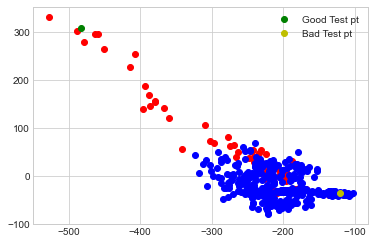

In [13]:
# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

xg = np.array([gVPs[i][0] for i in range(len(gVPs))])
yg = np.array([gVPs[i][1] for i in range(len(gVPs))])

xb = np.array([bVPs[i][0] for i in range(len(bVPs))])
yb = np.array([bVPs[i][1] for i in range(len(bVPs))])

# take the good point found from the "turnips-partialweek.csv" 
inputVector1 = np.array([104, 94, 139, 153, 520])
xgVP = np.matmul(inputVector1, VP)
xgVPx = xgVP[0]
xgVPy = xgVP[1]

# take a bad point found from the "turnips-partialweek.csv" 
inputVector2 = np.array([98, 49, 46, 42, 39])
xbVP = np.matmul(inputVector2, VP)
xbVPx = xbVP[0]
xbVPy = xbVP[1]

# Plotting
plt.scatter(xg, yg,color='r',marker='o')
plt.scatter(xb, yb,color='b',marker='o')
plt.plot(xgVPx, xgVPy,'go', label='Good Test pt')
plt.plot(xbVPx, xbVPy,'yo', label='Bad Test pt') 
plt.legend();
plt.show()

--- 
### Alright, now test it on the 2000 year data

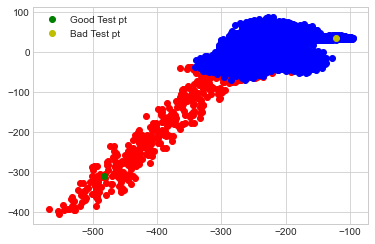

In [14]:
# read file + put in dataframe (also display data in a nice visual way)
x = pd.read_csv('turnips-2000years.csv', names=["DMP", "MAP", "MPP", "TuAP", "TuPP", "WAP", "WPP", "ThAP", "ThPP", "FAP", "FPP", "SAP", "SPP"])

# present data as an array/matrix
dmp = x["DMP"]
map = x["MAP"]
mpp = x["MPP"]
tuap = x["TuAP"]
tupp = x["TuPP"]
wap = x["WAP"]
wpp = x["WPP"]
thap = x["ThAP"]
thpp = x["ThPP"]
fap = x["FAP"]
fpp = x["FPP"]
sap = x["SAP"]
spp = x["SPP"]
data = np.array([dmp, map, mpp, tuap, tupp, wap, wpp, thap, thpp, fap, fpp, sap, spp])
data = data.T  # transpose so data appears correct 

# sift through and find good or bad weeks from data
g_dict = {}
b_dict = {}
hit = False
for i in range(10000):
    for j in range(13):
        if data[i][j] >= 200:
            hit = True
    if hit == True:
        g_dict[i] = data[i]
    else:
        b_dict[i] = data[i]
    hit = False     
    
# now remove prices after first 5 coordinates from the data so we only look at 
# Sunday, monday AM, monday PM, tuesday AM, and tuesday PM prices.
A = np.array([dmp, map, mpp, tuap, tupp])
A = A.T

# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

# get US
US = U[:, :5] * S

# project data
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)

# get matrix VP
V = VT.T
VP = np.matmul(V, P)
VP

# multiply VP by some length-5 row input vector
gVPs = []
bVPs = []
# for good weeks
for key in g_dict:
    g = A[key]
    gVP = np.matmul(g, VP)
    gVPs.append(gVP)
# for bad weeks
for key in b_dict:
    b = A[key]
    bVP = np.matmul(b, VP)
    bVPs.append(bVP)

# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

xg = np.array([gVPs[i][0] for i in range(len(gVPs))])
yg = np.array([gVPs[i][1] for i in range(len(gVPs))])

xb = np.array([bVPs[i][0] for i in range(len(bVPs))])
yb = np.array([bVPs[i][1] for i in range(len(bVPs))])

# take the good point found from the "turnips-partialweek.csv" 
inputVector1 = np.array([104, 94, 139, 153, 520])
xgVP = np.matmul(inputVector1, VP)
xgVPx = xgVP[0]
xgVPy = xgVP[1]

# take a bad point found from the "turnips-partialweek.csv" 
inputVector2 = np.array([98, 49, 46, 42, 39])
xbVP = np.matmul(inputVector2, VP)
xbVPx = xbVP[0]
xbVPy = xbVP[1]

# Plotting
plt.scatter(xg, yg,color='r',marker='o')
plt.scatter(xb, yb,color='b',marker='o')
plt.plot(xgVPx, xgVPy,'go', label='Good Test pt')
plt.plot(xbVPx, xbVPy,'yo', label='Bad Test pt') 
plt.legend();
plt.show()

Now, I see that there is a pattern here. For the 10 year data, the "good" points are focused in more the upper left, while the "bad" points are focused more on the lower right. For the 2000 year data, the "good" points are focused in more the lower left, while the "bad" points are focused more on the upper right. The test points confirm both of these. 

I am not completely sure I understand how to read the graphs, however. Why do they flip?

--- 
### And also on the partial year data

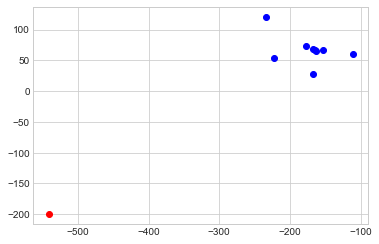

In [26]:
# read file + put in dataframe (also display data in a nice visual way)
x = pd.read_csv('turnips-partialweek.csv', names=["DMP", "MAP", "MPP", "TuAP", "TuPP"])

# present data as an array/matrix
dmp = x["DMP"]
map = x["MAP"]
mpp = x["MPP"]
tuap = x["TuAP"]
tupp = x["TuPP"]
A = np.array([dmp, map, mpp, tuap, tupp])
A = A.T  # transpose so data appears correct 

# sift through and find good or bad weeks from data
g_dict = {}
b_dict = {}
hit = False
for i in range(10):
    for j in range(5):
        if A[i][j] >= 200:
            hit = True
    if hit == True:
        g_dict[i] = A[i]
    else:
        b_dict[i] = A[i]
    hit = False     

# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

# get US
US = U[:, :5] * S

# project data
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)

# get matrix VP
V = VT.T
VP = np.matmul(V, P)
VP

# multiply VP by some length-5 row input vector
gVPs = []
bVPs = []
# for good weeks
for key in g_dict:
    g = A[key]
    gVP = np.matmul(g, VP)
    gVPs.append(gVP)
# for bad weeks
for key in b_dict:
    b = A[key]
    bVP = np.matmul(b, VP)
    bVPs.append(bVP)

# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

xg = np.array([gVPs[i][0] for i in range(len(gVPs))])
yg = np.array([gVPs[i][1] for i in range(len(gVPs))])

xb = np.array([bVPs[i][0] for i in range(len(bVPs))])
yb = np.array([bVPs[i][1] for i in range(len(bVPs))])

# Plotting
plt.scatter(xg, yg,color='r',marker='o')
plt.scatter(xb, yb,color='b',marker='o') 
plt.show()

---
## Problem 2
The file matrices.csv has eight 20×20 matrices A, B, C, D, E, F, G, H in it. Each row of data contains the matrix entries, row by row - so, for instance, the first row contains the entries A<sub>ij</sub> of the matrix A:

\begin{align} 
a_{1,1}, . . . , a_{1,20}, a_{2,1}. . . , a_{2,20}, . . . , . . . , a_{20,20}. \\
\end{align}

Which of these matrices are symmetric and positive definite?

In [15]:
# read file and split on number of spaces
z = pd.read_csv('some_matrices.csv', names=[i for i in range(0,400)]) # names necessary for top matrix (first line loads as header)
splits = np.array([z.loc[i] for i in z.index])

https://stackoverflow.com/questions/16266720/find-out-if-matrix-is-positive-definite-with-numpy

https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html

https://numpy.org/doc/stable/reference/generated/numpy.allclose.html

https://numpy.org/doc/stable/reference/generated/numpy.split.html

In [16]:
# test if matrix is symmetric i.e., the matrix is equal to its transpose
a1 = np.array(np.split(splits[0], 20)) # splits each data row so that it becomes a 20x20 matrix
print(f"Symmetric?: {np.allclose(a1, a1.T)}")

# test if matrix is positive definite
print(f"Positive definite?: {np.all(np.linalg.eigvals(a1) > 0)}") # check if all eigenvalues are positive
print(f"{np.linalg.cholesky(a1)}") # can also check to see if a Cholesky decomp fails (i.e., it is not positive definite)

Symmetric?: True
Positive definite?: True
[[ 3.60000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.00000000e-02  4.20000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.60000000e-01  2.00000000e-02  1.00000000e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+0

In [17]:
# write a function to do the rest because it is more efficient and I am lazy
def check_symmetric(A):
    """ checks for symmetry by seeing if the matrix and its transpose are the same """
    transpose = A.T
    return np.allclose(A, A.T)

def check_posDef1(A):
    """ checks for positive definiteness by seeing if all eigenvalues are positive """
    return np.all(np.linalg.eigvals(A) > 0)

def check_posDef2(A):
    """ checks for positive definiteness by seeing if Cholesky decomposition fails """
    try:
        np.linalg.cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False
        
for i in range(0, 10):
    A = np.array(np.split(splits[i], 20))
    print(f"Matrix {i}")
    print(f"Symmetric?: {check_symmetric(A)}")
    # include both as reassurance for my sake
    print(f"Positive Definite?: {check_posDef1(A)}")
    print(f"Positive Definite?: {check_posDef2(A)}")
    print("")

Matrix 0
Symmetric?: True
Positive Definite?: True
Positive Definite?: True

Matrix 1
Symmetric?: True
Positive Definite?: True
Positive Definite?: True

Matrix 2
Symmetric?: True
Positive Definite?: False
Positive Definite?: False

Matrix 3
Symmetric?: True
Positive Definite?: False
Positive Definite?: False

Matrix 4
Symmetric?: True
Positive Definite?: True
Positive Definite?: True

Matrix 5
Symmetric?: True
Positive Definite?: False
Positive Definite?: False

Matrix 6
Symmetric?: True
Positive Definite?: False
Positive Definite?: False

Matrix 7
Symmetric?: True
Positive Definite?: True
Positive Definite?: True

Matrix 8
Symmetric?: True
Positive Definite?: False
Positive Definite?: False

Matrix 9
Symmetric?: True
Positive Definite?: False
Positive Definite?: False

